In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download the Data

In [2]:
titles = pd.read_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [3]:
cast = pd.read_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


## Using groupby(), count the number of films that have been released in each decade in the history of cinema.

In [6]:
# First, create a new column called 'decade' in which the years are grouped into decades

cast['decade'] = (10 * (cast['year'] // 10))

# Then, groupby by new column 'decade' and get the total title count.

cast.groupby('decade').title.count()

decade
1890          3
1900         70
1910      42604
1920      71472
1930     199058
1940     211842
1950     211470
1960     187069
1970     215147
1980     283194
1990     381806
2000     746571
2010    1083959
2020        202
Name: title, dtype: int64

## Use groupby() count the number of "Hamlet" films made in each decade.

decade
1910    28
1920     9
1940    24
1950     1
1960    57
1970    19
1980     3
1990    83
2000    55
2010    34
Name: title, dtype: int64


<AxesSubplot: xlabel='decade'>

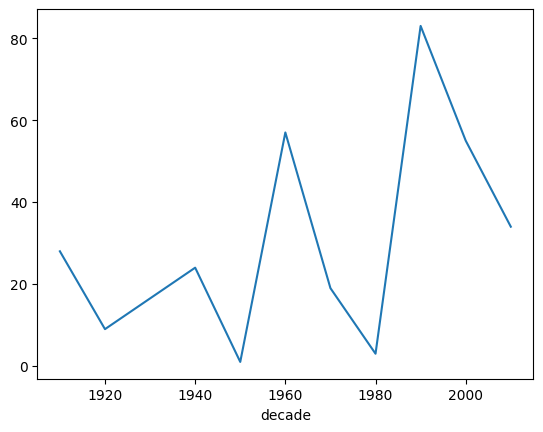

In [9]:
# Filter df for movies titled 'Hamlet'. Groupby decade. Get title counts.

print(cast[(cast['title'] == 'Hamlet')].groupby('decade').title.count())

# Plot for visualization purposes

cast[(cast['title'] == 'Hamlet')].groupby('decade').title.count().plot()

## How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [19]:
# Filter df for 'actor' & 'n' = 1. Groupby decade. Get title count and index to 5th position for 1950s.

actors = cast[(cast['type'] == 'actor') & (cast['n'] == 1.0)].groupby('decade').title.count().iloc[5]

# Filter df for 'actress' & 'n' = 1. Groupby decade. Get title count and index to 5th position for 1950s

actresses = cast[(cast['type'] == 'actress') & (cast['n'] == 1.0)].groupby('decade').title.count().iloc[5]

print(f'There were {actors} leading roles for actors and {actresses} leading roles for actresses in the 1950s.')

There were 6616 leading roles for actors and 2965 leading roles for actresses in the 1950s.


## In the 1950s taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [24]:
# Filter df for 'actor'. Filter again for all roles between n>=1 and n<6. Groupby decade, get title count

actors_1 = cast[(cast['type'] == 'actor') & ((cast['n'] >= 1.0) & (cast['n'] < 6.0))
               ].groupby('decade').title.count().iloc[5]

actresses_1 = cast[(cast['type'] == 'actress') & ((cast['n'] >= 1.0) & (cast['n'] < 6.0))
                  ].groupby('decade').title.count().iloc[5]

print(f'There were {actors_1} roles between "n" numbers 1 through 5 available to actors in the 1950s and {actresses_1} roles for actresses.')

There were 27972 roles between "n" numbers 1 through 5 available to actors in the 1950s and 16062 roles for actresses.


## Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [29]:
# Filter for titles containing the name 'Pink Panther'. Groupby titles, and get the total character count.

cast[(cast['title'].str.contains('Pink Panther'))].groupby('title').character.count()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        64
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     68
The Return of the Pink Panther     30
Trail of the Pink Panther          41
Name: character, dtype: int64

## List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [81]:
# Filter df for name 'Frank Oz'. Groupby title, use filter function for where title has a length > 1.
# Sort values by ascending order, drop duplicates.

cast[(cast['name'] == 'Frank Oz')
    ].groupby('title').filter(lambda x: len(x) > 1).sort_values('year')[['year', 'title']].drop_duplicates()

,year,title
1672042,1979,The Muppet Movie
1671990,1981,An American Werewolf in London
1672027,1981,The Great Muppet Caper
1672020,1982,The Dark Crystal
1672049,1984,The Muppets Take Manhattan
1671993,1985,Follow That Bird
1672033,1992,The Muppet Christmas Carol
1672003,1996,Muppet Treasure Island
1672017,1999,The Adventures of Elmo in Grouchland
1672004,1999,Muppets from Space


## List each of the characters that Frank Oz has portrayed at least twice.

In [77]:
# Filter df for 'Frank Oz'. Groupby 'character'. Use filter lambda function for characters that appear
# more than once. Select the character column and get the value counts.

cast[(cast['name'] == 'Frank Oz')
    ].groupby('character').filter(lambda x: len(x) > 1).character.value_counts()

Miss Piggy        6
Animal            6
Yoda              6
Sam the Eagle     5
Fozzie Bear       4
Cookie Monster    3
Bert              3
Grover            2
Name: character, dtype: int64